findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans Mono'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans.


Pearson Correlation Coefficient: 0.9996433318636081
Pearson Correlation Coefficient: 0.9998078046026693


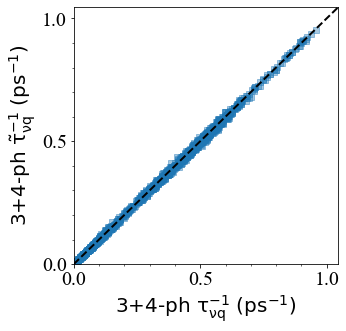

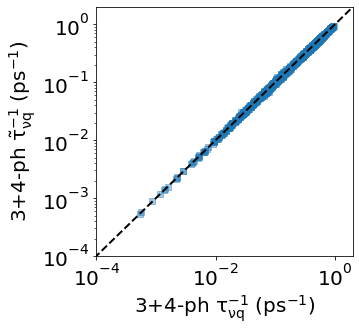

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 20

meV2psi = 3.034406901848772
#silicon
dirs='si/pert-4ph/'
nsv_3ph = 24
nsv_4ph = 48


x3 = np.loadtxt(dirs+'imsigma_3ph_tet_random.dat')
x4 = np.loadtxt(dirs+'imsigma_4ph_tet_random.dat')
dirs='si/pert-4ph-ft/'
y3 = np.loadtxt(dirs+'imsigma_3ph_tet_random.dat-nsv='+str(nsv_3ph))
y4 = np.loadtxt(dirs+'imsigma_4ph_tet_random_CP.dat-nsv='+str(nsv_4ph))

#total scattering rate
x = x3[:,1] + x4[:,4] #full
y = y3[:,1] + y4[:,4] #compress

plt.figure(figsize=(5.2,5))
plt.scatter( x * meV2psi, y * meV2psi , marker='s',c='tab:blue' , zorder=1, alpha=0.4 )

plt.xlabel(r'3+4-ph $\tau^{-1}_{\nu q}$ (ps$^{-1}$)')
plt.ylabel(r'3+4-ph $\tilde{\tau}^{-1}_{\nu q}$ (ps$^{-1}$)')

#plt.rcParams['text.usetex'] = False
correlation_matrix = np.corrcoef(x, y)
pearson_correlation = correlation_matrix[0, 1]
print(f"Pearson Correlation Coefficient: {pearson_correlation}")


ymax = np.max(y * meV2psi)*1.1
plt.plot([0,ymax],[0,ymax],'--',lw=2,c='k')
plt.xlim([0,ymax])
plt.ylim([0,ymax])
plt.yticks([0,0.5,1.0])
plt.xticks([0,0.5,1.0])
plt.minorticks_on()
#plt.grid(zorder=-10)
plt.tight_layout()
plt.savefig('si-scat-parity.pdf', dpi = 500)


plt.figure(figsize=(5.4,5))
plt.scatter( x * meV2psi, y * meV2psi , marker='s',c='tab:blue' , zorder=1, alpha=0.4 )

plt.xlabel(r'3+4-ph $\tau^{-1}_{\nu q}$ (ps$^{-1}$)')
plt.ylabel(r'3+4-ph $\tilde{\tau}^{-1}_{\nu q}$ (ps$^{-1}$)')

#plt.rcParams['text.usetex'] = False
correlation_matrix = np.corrcoef(np.log(x[x>0]), np.log(y[y>0]))
pearson_correlation = correlation_matrix[0, 1]
print(f"Pearson Correlation Coefficient: {pearson_correlation}")


ymax = np.max(y * meV2psi)*2.1
plt.plot([0,ymax],[0,ymax],'--',lw=2,c='k')
plt.xlim([1e-4,ymax])
plt.ylim([1e-4,ymax])
#plt.yticks([0,0.5,1.0])
#plt.xticks([0,0.5,1.0])
plt.semilogx()
plt.semilogy()
plt.minorticks_on()
#plt.grid(zorder=-10)
plt.tight_layout()
plt.savefig('si-scat-parity-log.pdf', dpi = 500)


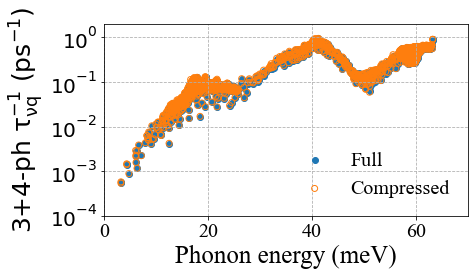

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 20

meV2psi = 3.034406901848772
#silicon
dirs='si/pert-4ph/'
nsv_3ph = 24
nsv_4ph = 48
plt.figure(figsize=(7,4))
x3 = np.loadtxt(dirs+'imsigma_3ph_tet_random.dat')
x4 = np.loadtxt(dirs+'imsigma_4ph_tet_random.dat')
dirs='si/pert-4ph-ft/'
y3 = np.loadtxt(dirs+'imsigma_3ph_tet_random.dat-nsv='+str(nsv_3ph))
y4 = np.loadtxt(dirs+'imsigma_4ph_tet_random_CP.dat-nsv='+str(nsv_4ph))

#total scattering rate
w = x3[:,0]
x = x3[:,1] + x4[:,4] #full
y = y3[:,1] + y4[:,4] #compress

plt.scatter( w, x * meV2psi, marker='o',c='tab:blue' , zorder=1, alpha=1 ,label='Full')
#plt.scatter( w, y * meV2psi, marker='o',c='none', edgecolors='tab:orange' , zorder=1, alpha=1, label=' $N_c^{(3)}, N_c^{(4)}=24,48$' )
#plt.scatter( w, y * meV2psi, marker='o',c='none', edgecolors='tab:orange' , zorder=1, alpha=1, label=' $\gamma^{(3)} = 2200, \gamma^{(4)}=2500$' )
plt.scatter( w, y * meV2psi, marker='o',c='none', edgecolors='tab:orange' , zorder=1, alpha=1, label='Compressed' )

plt.legend(frameon=False, fontsize=20)
plt.semilogy()
plt.xlim([0,70])
plt.ylim([1e-4,2])
plt.yticks([1e-4,1e-3,1e-2,1e-1,1e0])
plt.grid(linestyle='--')
plt.xlabel(r'Phonon energy (meV)', fontsize=25)
plt.ylabel(r'3+4-ph $\tau_{\nu q}^{-1}$ (ps$^{-1}$)', fontsize=25)
plt.tight_layout()
plt.savefig('si-34-scattering-log-comparison.pdf', dpi = 500)

Pearson Correlation Coefficient: 0.998599326597809
Pearson Correlation Coefficient: 0.9976161075657226


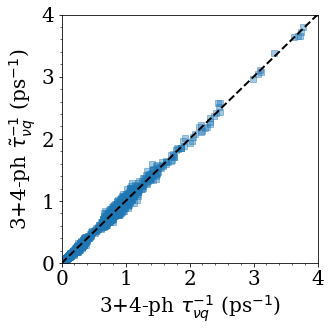

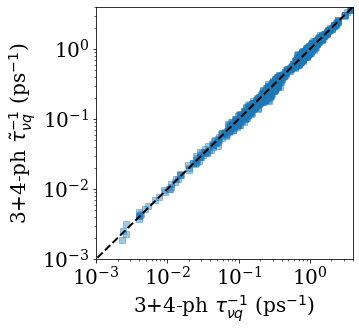

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 20

meV2psi = 3.034406901848772
#silicon
dirs='hgte/pert-4ph/'
nsv_3ph = 24
nsv_4ph = 48


x3 = np.loadtxt(dirs+'imsigma_3ph_tet_random.dat')
x4 = np.loadtxt(dirs+'imsigma_4ph_tet_random.dat')
dirs='hgte/pert-4ph-ft/'
y3 = np.loadtxt(dirs+'imsigma_3ph_tet_random.dat-nsv='+str(nsv_3ph))
y4 = np.loadtxt(dirs+'imsigma_4ph_tet_random_CP.dat-nsv='+str(nsv_4ph))

#total scattering rate
x = x3[:,1] + x4[:,4] #full
y = y3[:,1] + y4[:,4] #compress

plt.figure(figsize=(5,5))
plt.scatter( x * meV2psi, y * meV2psi , marker='s',c='tab:blue' , zorder=1, alpha=0.4 )

plt.xlabel(r'3+4-ph $\tau^{-1}_{\nu q}$ (ps$^{-1}$)')
plt.ylabel(r'3+4-ph $\tilde{\tau}^{-1}_{\nu q}$ (ps$^{-1}$)')

#plt.rcParams['text.usetex'] = False
correlation_matrix = np.corrcoef(x, y)
pearson_correlation = correlation_matrix[0, 1]
print(f"Pearson Correlation Coefficient: {pearson_correlation}")


ymax = np.max(y * meV2psi)*1.1
plt.plot([0,ymax],[0,ymax],'--',lw=2,c='k')
plt.xlim([0,4])
plt.ylim([0,4])
#plt.yticks([0,0.5,1.0])
#plt.xticks([0,0.5,1.0])
plt.minorticks_on()
#plt.grid(zorder=-10)
plt.tight_layout()
plt.savefig('hgte-scat-parity.pdf', dpi = 500)



plt.figure(figsize=(5.4,5))
plt.scatter( x * meV2psi, y * meV2psi , marker='s',c='tab:blue' , zorder=1, alpha=0.4 )

plt.xlabel(r'3+4-ph $\tau^{-1}_{\nu q}$ (ps$^{-1}$)')
plt.ylabel(r'3+4-ph $\tilde{\tau}^{-1}_{\nu q}$ (ps$^{-1}$)')

#plt.rcParams['text.usetex'] = False
correlation_matrix = np.corrcoef(np.log(x[x>0]), np.log(y[y>0]))
pearson_correlation = correlation_matrix[0, 1]
print(f"Pearson Correlation Coefficient: {pearson_correlation}")


ymax = np.max(y * meV2psi)*1.1
plt.plot([0,ymax],[0,ymax],'--',lw=2,c='k')
plt.xlim([1e-3,4])
plt.ylim([1e-3,4])
#plt.yticks([0,0.5,1.0])
#plt.xticks([0,0.5,1.0])
plt.semilogx()
plt.semilogy()
plt.minorticks_on()
#plt.grid(zorder=-10)
plt.tight_layout()
plt.savefig('hgte-scat-parity-log.pdf', dpi = 500)


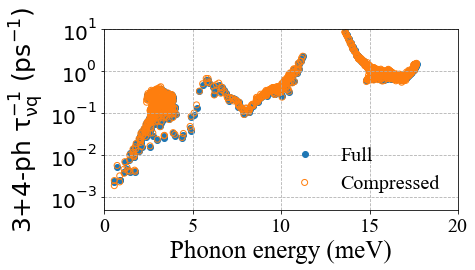

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 20

meV2psi = 3.034406901848772
#silicon
dirs='hgte/pert-4ph/'
nsv_3ph = 24
nsv_4ph = 48

plt.figure(figsize=(7,4))
x3 = np.loadtxt(dirs+'imsigma_3ph_tet_random.dat')
x4 = np.loadtxt(dirs+'imsigma_4ph_tet_random.dat')
dirs='hgte/pert-4ph-ft/'
y3 = np.loadtxt(dirs+'imsigma_3ph_tet_random.dat-nsv='+str(nsv_3ph))
y4 = np.loadtxt(dirs+'imsigma_4ph_tet_random_CP.dat-nsv='+str(nsv_4ph))

#total scattering rate
w = x3[:,0]
x = x3[:,1] + x4[:,4] #full
y = y3[:,1] + y4[:,4] #compress


plt.scatter( w, x * meV2psi, marker='o',c='tab:blue' , zorder=1, alpha=1 ,label='Full')
#plt.scatter( w, y * meV2psi, marker='o',c='none', edgecolors='tab:orange' , zorder=1, alpha=1, label=' $N_c^{(3)}, N_c^{(4)}= 24, 48$' )
#plt.scatter( w, y * meV2psi, marker='o',c='none', edgecolors='tab:orange' , zorder=1, alpha=1, label=' $\gamma^{(3)} = 2200, \gamma^{(4)}=2500$' )
plt.scatter( w, y * meV2psi, marker='o',c='none', edgecolors='tab:orange' , zorder=1, alpha=1, label='Compressed' )

plt.legend(frameon=False, fontsize=20)
plt.grid(linestyle='--')
plt.semilogy()
plt.xlim([0,20])
plt.ylim([1e-3*0.5,1e1])
plt.yticks([1e-3,1e-2,1e-1,1e0,1e1])
plt.grid(linestyle='--')
plt.xlabel(r'Phonon energy (meV)', fontsize=25)
plt.ylabel(r'3+4-ph $\tau_{\nu q}^{-1}$ (ps$^{-1}$)', fontsize=25)
plt.tight_layout()
plt.savefig('hgte-34-ph-scattering-log-comparison.pdf', dpi = 500)

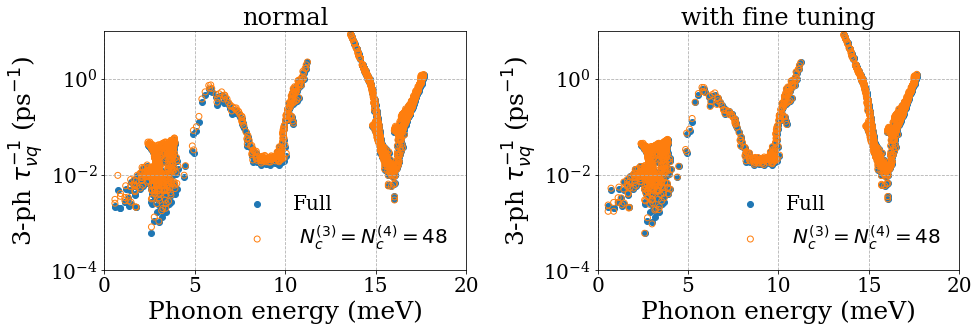

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 20

meV2psi = 3.034406901848772


#silicon
dirs='hgte/pert-4ph/'
nsv_3ph = 24
nsv_4ph = 48

plt.figure(figsize=(14,5))
plt.subplot(122)
x3 = np.loadtxt(dirs+'imsigma_3ph_tet_random.dat')
x4 = np.loadtxt(dirs+'imsigma_4ph_tet_random.dat')
dirs='hgte/pert-4ph-ft/'
y3 = np.loadtxt(dirs+'imsigma_3ph_tet_random.dat-nsv='+str(nsv_3ph))
y4 = np.loadtxt(dirs+'imsigma_4ph_tet_random_CP.dat-nsv='+str(nsv_4ph))

#total scattering rate
w = x3[:,0]
x = x3[:,1] #+ x4[:,4] #full
y = y3[:,1] #+ y4[:,4] #compress


plt.scatter( w, x * meV2psi, marker='o',c='tab:blue' , zorder=1, alpha=1 ,label='Full')
plt.scatter( w, y * meV2psi, marker='o',c='none', edgecolors='tab:orange' , zorder=1, alpha=1, label=' $N_c^{(3)}= N_c^{(4)}=48$' )
plt.title('with fine tuning')
plt.legend(frameon=False, fontsize=20)
plt.semilogy()
plt.xlim([0,20])
plt.ylim([1e-4,1e1])
plt.grid(linestyle='--')
plt.xlabel(r'Phonon energy (meV)', fontsize=25)
plt.ylabel(r'3-ph $\tau_{\nu q}^{-1}$ (ps$^{-1}$)', fontsize=25)


plt.subplot(121)
dirs='hgte/pert-4ph/'
x3 = np.loadtxt(dirs+'imsigma_3ph_tet_random.dat')
x4 = np.loadtxt(dirs+'imsigma_4ph_tet_random.dat')
dirs='hgte/pert-4ph/'
y3 = np.loadtxt(dirs+'imsigma_3ph_tet_random.dat-nsv='+str(nsv_3ph))
y4 = np.loadtxt(dirs+'imsigma_4ph_tet_random_CP.dat-nsv='+str(nsv_4ph))

#total scattering rate
w = x3[:,0]
x = x3[:,1] #+ x4[:,4] #full
y = y3[:,1] #+ y4[:,4] #compress


plt.scatter( w, x * meV2psi, marker='o',c='tab:blue' , zorder=1, alpha=1 ,label='Full')
plt.scatter( w, y * meV2psi, marker='o',c='none', edgecolors='tab:orange' , zorder=1, alpha=1, label=' $N_c^{(3)}= N_c^{(4)}=48$' )

plt.title('normal')
plt.legend(frameon=False, fontsize=20)
plt.semilogy()
plt.xlim([0,20])
plt.ylim([1e-4,1e1])
plt.grid(linestyle='--')
plt.xlabel(r'Phonon energy (meV)', fontsize=25)
plt.ylabel(r'3-ph $\tau_{\nu q}^{-1}$ (ps$^{-1}$)', fontsize=25)
plt.tight_layout()
plt.tight_layout()
plt.savefig('hgte-3ph-scattering-log-comparison.pdf', dpi = 500)

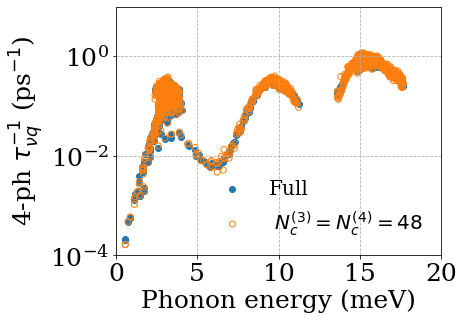

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 25

meV2psi = 3.034406901848772
#silicon
dirs='hgte/pert-4ph/'
nsv = 48

plt.figure(figsize=(7,5))
x3 = np.loadtxt(dirs+'imsigma_3ph_tet_random.dat')
x4 = np.loadtxt(dirs+'imsigma_4ph_tet_random.dat')
dirs='hgte/pert-4ph-ft/'
y3 = np.loadtxt(dirs+'imsigma_3ph_tet_random.dat-nsv='+str(nsv))
y4 = np.loadtxt(dirs+'imsigma_4ph_tet_random_CP.dat-nsv='+str(nsv))

#total scattering rate
w = x3[:,0]
x =  x4[:,4] #full
y = y4[:,4] #compress


plt.scatter( w, x * meV2psi, marker='o',c='tab:blue' , zorder=1, alpha=1 ,label='Full')
plt.scatter( w, y * meV2psi, marker='o',c='none', edgecolors='tab:orange' , zorder=1, alpha=1, label=' $N_c^{(3)}= N_c^{(4)}=48$' )

plt.legend(frameon=False, fontsize=20)
plt.semilogy()
plt.xlim([0,20])
plt.ylim([1e-4,1e1])
plt.grid(linestyle='--')
plt.xlabel(r'Phonon energy (meV)', fontsize=25)
plt.ylabel(r'4-ph $\tau_{\nu q}^{-1}$ (ps$^{-1}$)', fontsize=25)
plt.tight_layout()
plt.savefig('hgte-4ph-scattering-log-comparison.pdf', dpi = 500)